In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from joblib import Parallel, delayed
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical



preprocessed_df = pd.read_csv('/content/drive/MyDrive/DDos_dataset.csv')
preprocessed_df.size

28898436

##Preprocessing

In [ ]:
def z_score(df):
  df_std = df.copy()
  for column in df_std.columns:
    if df_std[column].std() != 0:
      df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    else:
      df_std[column] = 0
  return df_std

def preprocess_data(data):
  normalized_df = z_score(data.loc[:, data.columns != ' Label'])
  normalized_df[' Label'] = data[' Label']

  train_df, test_df = train_test_split(normalized_df, test_size=0.15, shuffle=True)
  temp = train_df.loc[:, train_df.columns != ' Label']
  X_train = temp.to_numpy()
  y_train = train_df[' Label'].to_numpy()
  temp = test_df.loc[:, test_df.columns != ' Label']
  X_test = temp.to_numpy()
  y_test = test_df[' Label'].to_numpy()
  return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = preprocess_data(preprocessed_df)
X_train.size

24202410

##Random Forest Classifier

Accuracy: 0.8676643606757966
Precision:  0.860171067945477
Recall:  0.861046555241929
F1-score:  0.8477940082338
Confusion Matrix:


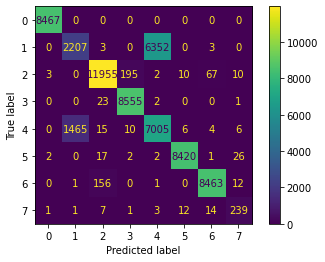

In [ ]:
# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Fit the model to the training data
rfc.fit(X_train, y_train)

# Use the trained model to predict the test data
y_pred = rfc.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

##SVM

In [ ]:
# Define SVM classifier
svm = SVC(kernel='rbf', C=1, decision_function_shape='ovr')

n_cores = 2
# Train the SVM model in parallel
svm_models = Parallel(n_jobs=n_cores)(delayed(svm.fit)(X_train, y_train) for i in range(n_cores))

# Predict the test set labels using each SVM model and take the majority vote
test_predictions = []
for model in svm_models:
    y_pred = model.predict(X_test)
    test_predictions.append(y_pred)
y_pred = [max(set(predictions), key=predictions.count) for predictions in zip(*test_predictions)]


# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
# conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8522126531444617
Precision:  0.8390785641987968
Recall:  0.7763377347666801
F1-score:  0.7809483282325292
Confusion Matrix:
[[ 8461     3     0     0     0     3     0     0]
 [    2  2228     3     0  6318     0    14     0]
 [    9     0 11527   255     1     9   425    16]
 [    0     2   101  8477     0     1     0     0]
 [    5  1585    47     0  6854    10     9     1]
 [   21     0    15     0     1  8422     5     6]
 [    0     0   347     0     2     0  8284     0]
 [    6     0    49     0     0    16   134    73]]


##Logistic Regression

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.838831631292453
Precision:  0.8106084254091187
Recall:  0.7683219628912787
F1-score:  0.7766004514639698
Confusion Matrix:


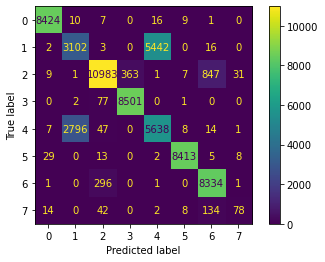

In [ ]:

# Create a logistic regression classifier with default parameters
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

##KNN

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Optimal K: 29
Accuracy: 0.8694683671388458
Precision:  0.8637645701828847
Recall:  0.8631316759490524
F1-score:  0.8525551837300378
Confusion Matrix:
[[ 8442     2     0     0     0    22     1     0]
 [    2  2517     3     0  6036     0     5     2]
 [    5     1 11960   187     9    11    60     9]
 [    1     2    68  8498    10     1     1     0]
 [    1  1546    28     0  6916    11     7     2]
 [   11     2    11     0     4  8424     2    16]
 [    0     4   178     0     0     0  8429    22]
 [    4     0    13     0     2    14     5   240]]


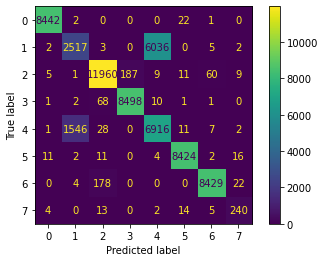

In [ ]:
# Try different values of K
k_values = list(range(1, 30))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal value of K
optimal_k = k_values[np.argmax(cv_scores)]
print("Optimal K:", optimal_k)

# Create the KNN classifier with optimal_k
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix)
print(conf_matrix_dis)

##GMB

Accuracy: 0.8670055061414654
Precision:  0.8726745950380949
Recall:  0.8670055061414654
F1-score:  0.8568224196468205
Confusion Matrix:


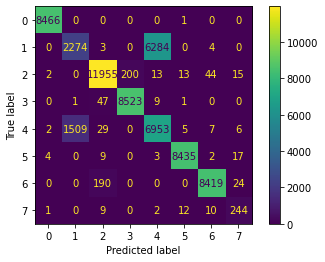

In [ ]:
# Define the model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(gbm, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

##PCA

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


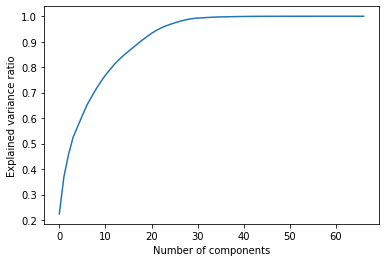

Accuracy: 0.8404395500964751
Precision:  0.8110520655381601
Recall:  0.7750825821780838
F1-score:  0.7829059018246737
Confusion Matrix:


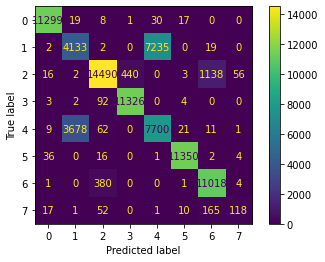

In [ ]:
# Split dataset into features and target variable
X = preprocessed_df.iloc[:, :-1].values
y = preprocessed_df.iloc[:, -1].values

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA to reduce the number of features
pca = PCA(n_components=X.shape[1])
X = pca.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

##LSTM

In [ ]:
# Convert the target variable to categorical
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the input data for the LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
# conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix)
# print(conf_matrix_dis)

Epoch 1/10
10625/10625 [==============================] - 66s 6ms/step - loss: 1.8742 - accuracy: 0.2126 - val_loss: 1.9578 - val_accuracy: 0.1900
Epoch 2/10
10625/10625 [==============================] - 59s 6ms/step - loss: 0.9241 - accuracy: 0.5995 - val_loss: 0.3598 - val_accuracy: 0.8031
Epoch 3/10
10625/10625 [==============================] - 59s 6ms/step - loss: 0.3856 - accuracy: 0.8079 - val_loss: 0.3605 - val_accuracy: 0.8189
Epoch 4/10
10625/10625 [==============================] - 60s 6ms/step - loss: 0.3827 - accuracy: 0.8062 - val_loss: 0.4267 - val_accuracy: 0.7924
Epoch 5/10
10625/10625 [==============================] - 59s 6ms/step - loss: 0.3467 - accuracy: 0.8228 - val_loss: 0.3485 - val_accuracy: 0.8220
Epoch 6/10
10625/10625 [==============================] - 59s 6ms/step - loss: 0.3251 - accuracy: 0.8281 - val_loss: 0.3340 - val_accuracy: 0.8302
Epoch 7/10
10625/10625 [==============================] - 59s 6ms/step - loss: 0.3102 - accuracy: 0.8341 - val_loss: 0

##neural Network

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential(layers=[
                                    tf.keras.layers.Dense(units=67, activation='relu', input_shape=(67,), kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(units=100, activation = 'relu', kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(units=8, activation = 'softmax'),
])
model.compile(
        loss = 'categorical_crossentropy',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics = [ 'accuracy',
                    tf.keras.metrics.Precision(),
                    tf.keras.metrics.Recall(),
                  ])
model.summary()

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 8)
y_test = tf.keras.utils.to_categorical(y_test, 8)
model.fit(x = X_train,
          y = y_train,
          batch_size=64,
          epochs=15,
          validation_split=0.1,
          )

In [ ]:
y_pred = model.predict(X_test)

y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
# conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix)
# print(conf_matrix_dis)

##Lazy Model 
KNN/RF/SVM/PCA/GMB


In [ ]:
from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier(n_estimators=100)
svm = SVC(kernel='rbf', C=1, decision_function_shape='ovr')
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 30)


# Define a list of classifiers to be used in the ensemble
classifiers = [
    ('knn', knn),
    ('rfc', rfc),
    ('svm', svm),
    ('gbm', gbm)
]

# Create a VotingClassifier object with majority voting
ensemble = VotingClassifier(estimators=classifiers, voting='hard')

# Fit the ensemble on the training data
ensemble.fit(X_train, y_train)

# Evaluate the ensemble on the test data
accuracy = ensemble.score(X_test, y_test)

Accuracy: 0.8658917282381916
Precision:  0.8715271465070162
Recall:  0.8658917282381916
F1-score:  0.8557048339911912
Confusion Matrix:


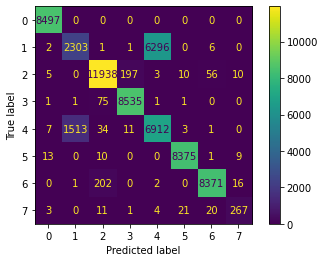

In [ ]:
y_pred = ensemble.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(ensemble, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

In [ ]:
from sklearn.ensemble import StackingClassifier

rfc = RandomForestClassifier(n_estimators=100)
svm = SVC(kernel='rbf', C=1, decision_function_shape='ovr')
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 30)

estimators = [
    ('knn', knn),
    ('rfc', rfc),
    ('svm', svm),
    ('gbm', gbm)
]

# Define the meta model
meta_estimator = LogisticRegression(random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=meta_estimator)

# Fit the stacking classifier on the training data
stacking_clf.fit(X_train, y_train)

In [ ]:
y_pred = stacking_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics to the console
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

# Get the confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_dis = ConfusionMatrixDisplay.from_estimator(stacking_clf, X_test, y_test)

print("Confusion Matrix:")
print(conf_matrix_dis)

##Eager Model
LR/LSTM/